# ■Sprint4 機械学習スクラッチ　ロジスティック回帰

# 採点よろしくお願い致します！

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
e = math.e

In [91]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = True
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = None
        self.h = None
        self.λ = 0.01

    def _linear_hypothesis(self,X):
       # X = np.insert(X,0,1,axis=1)
        dot = np.dot(X ,self.theta.T)
        self.h = 1 / (1 + e**-dot)

        return self.h

    def _error(self,y):
        #求めた仮定関数とyの差分を考える
        return self.h.reshape(-1,1) - y.reshape(-1,1)
    
    def _gradient_descent(self,X,y,error):
        '''
        ■方針
        θが0の時と1以降で計算式を分ける
        DIVERは1個のθに注目しているが
        下記では全て一気に計算する方法で実装する
        '''
        #データの個数を取得
        m = X.shape[0]
        
        #αの右側のJ(θ)をθ0の微分を考える
        #下記がαよりも右側の式を表す
        #Xjは自分でinsertした1が入るので実質的に式に影響を与えない。
        bias = np.sum(error)/m
        #αの右側のJ(θ)をθ0の微分を考える
        #mainの次元指定に超注意[:,1:]
        #λはハイパーパラメータ
        main = (np.dot(error.T, X [:,1:]) /m)+self.λ*self.theta[1:]/m
        
        self.theta[0] = self.theta[0] - self.lr*bias
        self.theta[1:] = self.theta[1:] - self.lr*main
        
        return self.theta
    
    def _purpose(self,X,y):
        m = X.shape[0]
        loss = np.sum(-y*np.log(self.h) - (1-y)*np.log(1-self.h))/m + self.λ*np.sum(self.theta**2)/2*m
        return loss

    def _predict_proba(self, X):
        if self.bias:
            X=np.insert(X,0, 1,axis=1)
                    
        y_predict = np.dot(X ,self.theta.T)
        y_predict = 1 / (1 + e**-y_predict)
        #lists = np.zeros(self.h.shape[0])
        lists = np.where(y_predict >= 0.5, 1, 0)
        return lists
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        if self.bias:
            X=np.insert(X,0, 1,axis=1)
            if X_val is not None:
                 X_val =np.insert(X_val,0, 1,axis=1)
        
        self.theta = np.random.rand(X.shape[1])    

        
        for i in range(self.iter):
            self._linear_hypothesis(X)
            self.error_value = self._error(y)
            self.theta = self._gradient_descent(X,y,self.error_value)
            #print("thetaを表示{}".format(self.theta))
            self.purpose =self._purpose(X,y)
            self.loss[i] = self.purpose
             
            if X_val is not None:
                #X_valの仮定関数も作る必要がある
                self._linear_hypothesis(X_val)
                self.purpose2 = self._purpose(X_val,y_val)
                self.val_loss[i] = self.purpose2

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
        return 


# 【問題1】仮定関数

def _linear_hypothesis(self,X):

上記箇所

シグモイド関数はimport mathで利用

# 【問題2】最急降下法

まず仮定関数で求めた結果とyの差分を関数errorと置く

def _error(self,y):
    
これを利用し

def _gradient_descent(self,X,y,error):

を作成
    

# 【問題3】推定

 def _predict_proba(self, X):
 
 箇所です！
 ## ■※質問
  ## 動かすためにここで切片の追加を記述したのですがこの処理で正しいか教えてほしいです！
 

## 【問題4】目的関数

def _purpose(self,X,y):

箇所です！

self.loss、self.val_lossの記録に関しては

 def fit(self, X, y, X_val=None, y_val=None):
 
 内に記載あります！

## 【問題5】学習と推定

In [92]:
'''
■irisのデータセットを用意する
targetを見るとvirgicolorとvirginicaの箇所は1と2でこのまま使えないので
自分で0と1の配列を作って適応させる事にする。
同時にXも50行目以降を利用する
'''
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = iris.data[:, :]
y = iris.target

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
zero = np.zeros(50)
one = np.ones(50)

zero.reshape(-1,1)
one.reshape(-1,1)
X = X[50:,:]

new_y= np.concatenate([zero,one])
y = new_y.reshape(-1,1)

In [94]:
'''
■Sckit-learnのtrain_test_splitを利用して
データを学習用とテスト用に分ける
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,   shuffle=True)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 4), (25, 4), (75, 1), (25, 1))

In [96]:
slr =  ScratchLogisticRegression(num_iter=5000, lr=0.001,bias=True, verbose=None)
slr.fit(X_train , y_train , X_test , y_test)

In [97]:
y_pred = slr._predict_proba(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1])

# 【問題6】学習と推定

In [60]:
y_test.shape

(25, 1)

In [98]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1])

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
corect_percent = accuracy_score(y_pred, y_test)*100
fit_percent = precision_score(y_pred, y_test, average='macro')*100
recall_percent = recall_score(y_pred, y_test, average='macro')*100
f1_percent = f1_score(y_pred, y_test, average='macro')*100

print('①正解率は{:.2f}%です'.format(corect_percent))
print('②適合率は{:.2f}%です'.format(fit_percent))
print('③再現率は{:.2f}%です'.format(recall_percent))
print('④F値は{:.2f}%です'.format(f1_percent))

①正解率は84.00%です
②適合率は84.52%です
③再現率は80.21%です
④F値は81.62%です


# 【問題7】学習曲線のプロット

In [63]:
slr.loss

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
slr.val_loss

array([0., 0., 0., ..., 0., 0., 0.])

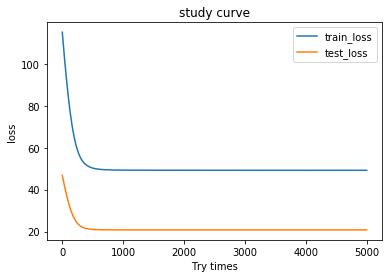

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(slr.loss)) , slr.loss , label = "train_loss")
plt.plot(np.arange(len(slr.val_loss)) , slr.val_loss , label = "test_loss")
plt.title("study curve")
plt.xlabel("Try times")
plt.ylabel("loss")
plt.legend()
plt.show()

## 【問題8】決定領域の可視化

下記のコードは以前の課題で使ったものを流用。

特徴量４つの状態でプロットが出来ないので

特徴量を２つ選出しその境界線を引く

In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model._predict_proba(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

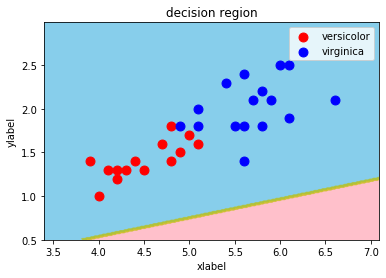

In [104]:
slr =  ScratchLogisticRegression(num_iter=5000, lr=0.001,bias=True, verbose=None)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,train_size=0.70)
#学習させる
slr.fit(X_train2[:,2:4] , y_train2 , X_test2[:,2:4] , y_test2)

decision_region(X_test2[:,2:4], y_test2.reshape(-1),slr, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

# ■質問
いくら特徴量が２つだからと言ってあまりにもズレを感じるので間違ってる点があれば教えて頂きたいです。